# ✅1: Import Libraries

In [1]:
# 1: Import Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Plotting settings
%matplotlib inline
sns.set(style="whitegrid")

# ✅2:Read and Analysis

In [ ]:
dataset=pd.read_csv(r'D:\Projects\projects\Data-analysis\Advertising Click-Through Rate (CTR) Prediction\data\advertising.csv')

## shape

In [3]:
print("Shape:", dataset.shape)

Shape: (1000, 10)


## Info

In [4]:
print("Info:")
dataset.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


## Missing Values

In [5]:
print("\nMissing Values:")
print(dataset.isna().sum())


Missing Values:
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


## First five rows

In [6]:
print("\nFirst five rows:")
display(dataset.head())



First five rows:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## columns Values

In [7]:
dataset['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

#### Distribution of target variable


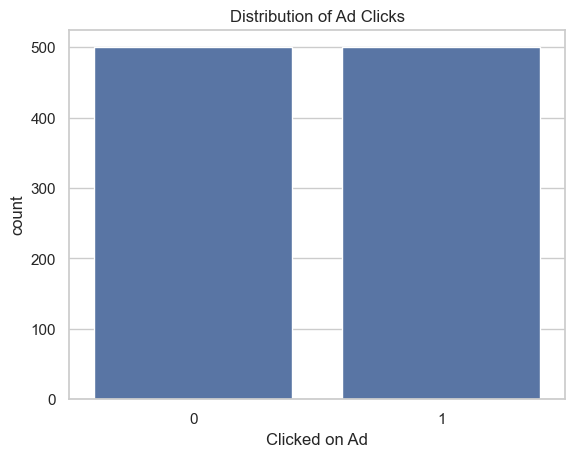

In [8]:
sns.countplot(x="Clicked on Ad", data=dataset)
plt.title("Distribution of Ad Clicks")
plt.show()

## cheak duplicated

In [9]:
dataset.duplicated().sum()

np.int64(0)

# ✅3: Professional Feature Engineering

### Extracting features from Timestamp

In [10]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])
dataset['Hour'] = dataset['Timestamp'].dt.hour
dataset['DayOfWeek'] = dataset['Timestamp'].dt.dayofweek # 0=Monday, 6=Sunday

#### 
Dropping categorical columns that require encoding or aren't useful for basic Decision Tree
## Note: Country and City could be used with Label Encoding, but for now we focus on numerical behavior

In [11]:
dataset = dataset.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

In [12]:
print("Features after engineering:")
print(dataset.columns.tolist())

Features after engineering:
['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Hour', 'DayOfWeek']


In [13]:
display(dataset.head())

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,DayOfWeek
0,68.95,35,61833.90,256.09,0,0,0,6
1,80.23,31,68441.85,193.77,1,0,1,0
2,69.47,26,59785.94,236.50,0,0,20,6
3,74.15,29,54806.18,245.89,1,0,2,6
4,68.37,35,73889.99,225.58,0,0,3,4


# ✅4: Advanced Visualizations (EDA)

### 1. Visualizing Relationships and Distributions


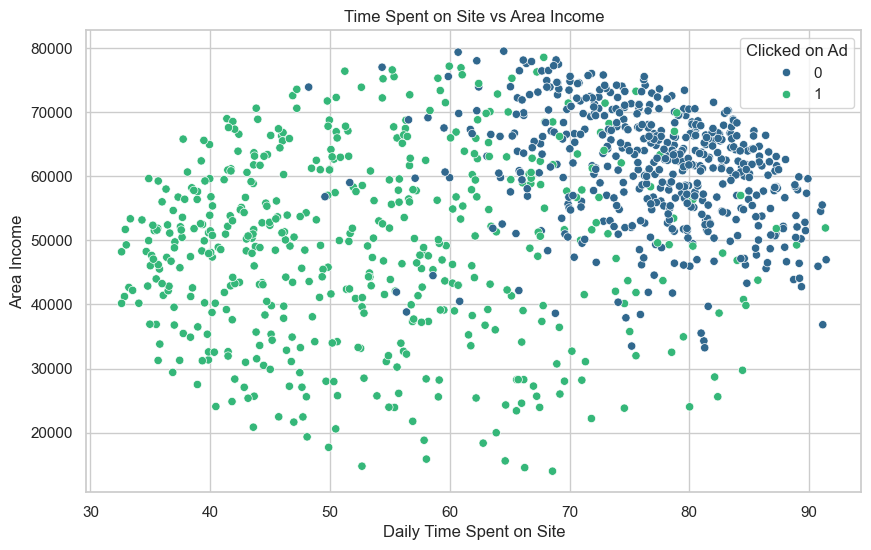

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Daily Time Spent on Site', y='Area Income', hue='Clicked on Ad', palette='viridis')
plt.title('Time Spent on Site vs Area Income')
plt.show()

### 2. Visualize click behavior across different hours of the day


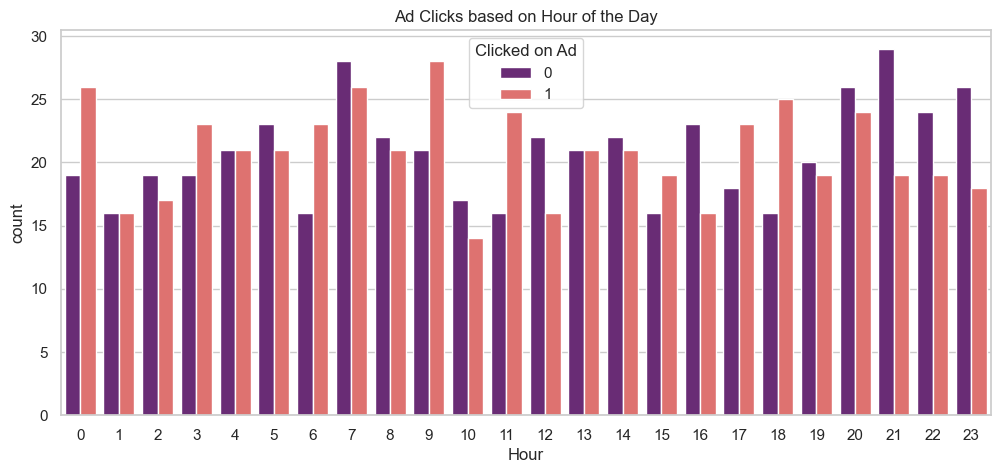

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(data=dataset, x='Hour', hue='Clicked on Ad', palette='magma')
plt.title('Ad Clicks based on Hour of the Day')
plt.show()

### 3. Heatmap for correlations


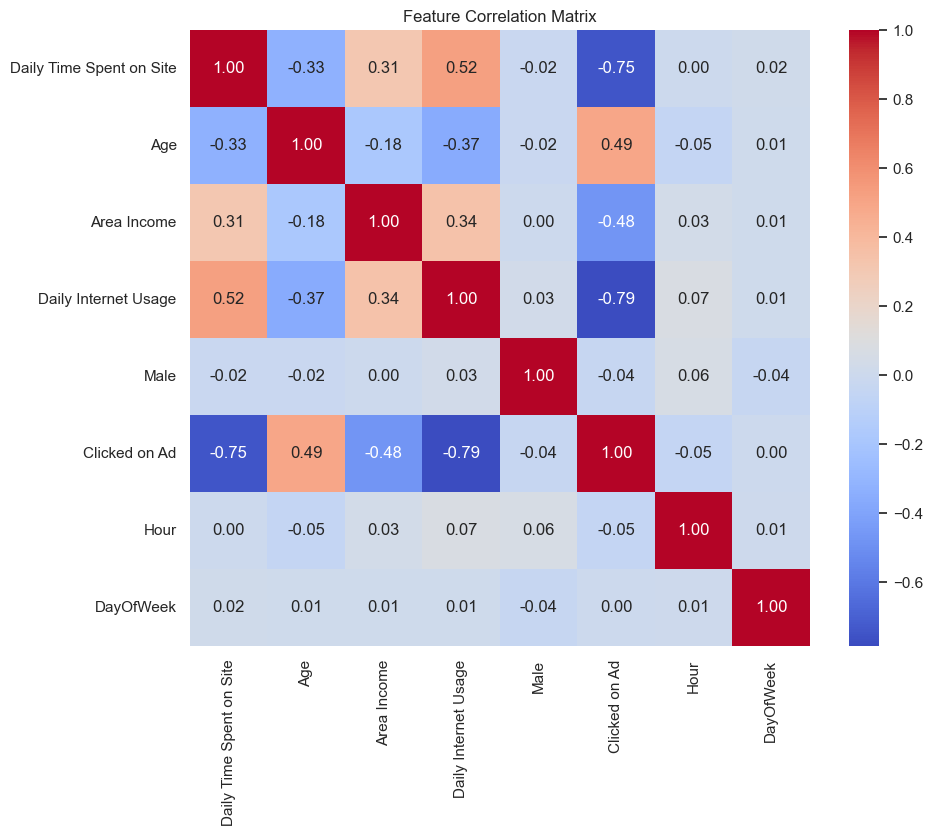

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# ✅5: Data Splitting and Scaling

In [17]:
x = dataset.drop(['Clicked on Ad'],axis=1)
y = dataset["Clicked on Ad"]

# split data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.3, random_state=42)

## scaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 700 samples
Testing set size: 300 samples


# ✅6: Model Training and Hyperparameter Tuning

### Initialize the Decision Tree classifier

### Define the set of hyperparameters to test during the grid search

In [21]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Initialize GridSearchCV with a DecisionTreeClassifier

In [22]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [23]:
# Retrieve the dictionary of the best-performing hyperparameters found during the search
best_clf = grid_search.best_params_
print(f"Best Parameters found: {best_clf}")

Best Parameters found: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [24]:
# Train the final model with best parameters
model = grid_search.best_estimator_

# ✅7: Comprehensive Evaluation

In [25]:
y_pred = model.predict(X_test)

### Accuracy and Classification Report

In [26]:
print("--- Final Model Performance ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Final Model Performance ---
Accuracy Score: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       146
           1       0.96      0.92      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### Cross-Validation Score to check for Overfitting

In [27]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

In [28]:
print(f"10-Fold Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")
print(f"CV Standard Deviation: {cv_scores.std():.4f}")

10-Fold Cross-Validation Mean Accuracy: 0.9543
CV Standard Deviation: 0.0190


# ✅8:visualizations

#### Confusion matrix visualization

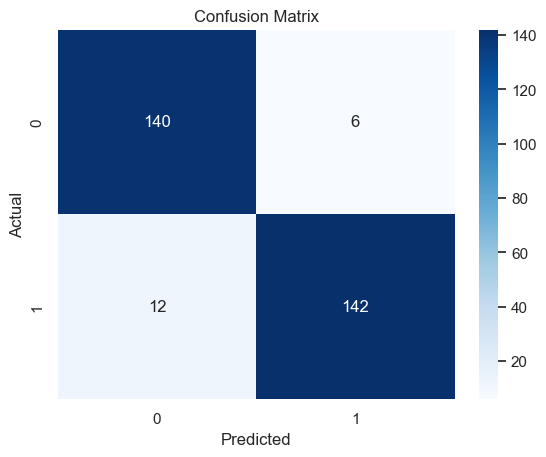

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

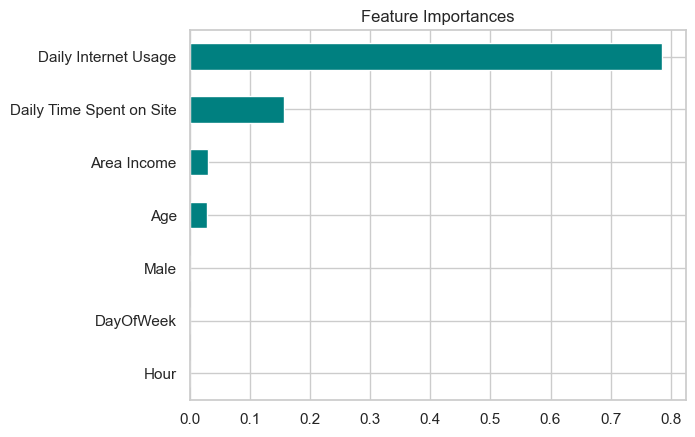

In [30]:
importances = pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importances')
plt.show()